In [1]:
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

query = """
    SELECT *
    FROM nash_nppes
"""

nash_nppes = pd.read_sql(query,db)

In [33]:
db.close()

In [4]:
nash_nppes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38148 entries, 0 to 38147
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   npi                  38148 non-null  int64  
 1   entity_type_code     38148 non-null  float64
 2   org_name             7466 non-null   object 
 3   last_name            30681 non-null  object 
 4   first_name           30682 non-null  object 
 5   middle_name          19790 non-null  object 
 6   name_prefix          11470 non-null  object 
 7   name_suffix          895 non-null    object 
 8   provider_credential  25175 non-null  object 
 9   address_1            38148 non-null  object 
 10  address_2            9877 non-null   object 
 11  city                 38148 non-null  object 
 12  state                38148 non-null  object 
 13  zip                  38148 non-null  object 
 14  taxonomy_code        38148 non-null  object 
 15  cbsa                 38148 non-null 

In [195]:
test.state.unique()

array(['TN'], dtype=object)

In [30]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

query = """
    SELECT *
    FROM nucc_taxonomy
"""

taxonomy = pd.read_sql(query,db)

db.close()

In [31]:
taxonomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   code                865 non-null    object
 1   grouping            865 non-null    object
 2   classification      865 non-null    object
 3   specialization      625 non-null    object
 4   definition          857 non-null    object
 5   effective_date      865 non-null    object
 6   deactivation_date   10 non-null     object
 7   last_modified_date  230 non-null    object
 8   notes               529 non-null    object
 9   display_name        865 non-null    object
dtypes: object(10)
memory usage: 67.7+ KB


In [8]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

query = """
    SELECT COUNT(*)
    FROM hop_team
"""

hop_team = pd.read_sql(query,db)

db.close()

In [9]:
hop_team

,COUNT(*)
0,31704890


### How many records in the hop_team table overlap with NPI numbers in nash_nppes?

In [24]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

query = """
    SELECT COUNT(*)
    FROM hop_team
    WHERE from_npi IN(
        SELECT DISTINCT(npi)
        FROM nash_nppes)
    AND to_npi IN(
        SELECT DISTINCT(npi)
        FROM nash_nppes)
"""

hops = pd.read_sql(query,db)

db.close()

In [25]:
hops

,COUNT(*)
0,138493


There are 214,316 records in hop_team where the 'from_npi' NPI code matches one in the nash_nppes table

There are 214,080 records in hop_team where the 'to_npi' NPI code matches one in the nash_nppes table

In total, there are 138,493 hop_team records where both the 'to' and 'from' NPIs are in the nash_nppes table

### Add the filtered table to the database as 'nash_hops'

In [26]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

query = """
    SELECT *
    FROM hop_team
    WHERE from_npi IN(
        SELECT DISTINCT(npi)
        FROM nash_nppes)
    AND to_npi IN(
        SELECT DISTINCT(npi)
        FROM nash_nppes)
"""

nash_hops = pd.read_sql(query,db)

db.close()

In [27]:
nash_hops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138493 entries, 0 to 138492
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   from_npi           138493 non-null  int64  
 1   to_npi             138493 non-null  int64  
 2   patient_count      138493 non-null  int64  
 3   transaction_count  138493 non-null  int64  
 4   average_day_wait   138493 non-null  float64
 5   std_day_wait       138493 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 6.3 MB


In [32]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #open connection

nash_hops.to_sql('nash_hops', db, if_exists = 'append', index = False) #save nash_hops data

db.close() #close connection

OperationalError: database is locked

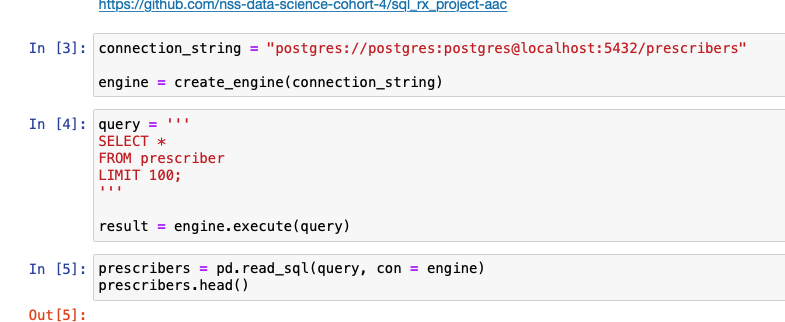